In [159]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import cnames
from sklearn.linear_model import LinearRegression
import re

## ___GLMM___
----------------

In [ ]:
# https://medium.com/@akif.iips/understanding-random-effect-and-fixed-effect-in-statistical-analysis-db4983cdf8b1
# https://stats.oarc.ucla.edu/other/mult-pkg/introduction-to-linear-mixed-models/#:~:text=Linear%20mixed%20models%20are%20an%20extension%20of,within%20classrooms%2C%20or%20patients%20from%20within%20doctors.
# https://m-clark.github.io/mixed-models-with-R/

In [ ]:
# first of all, all of thes are linear models, WE ARE ESSENTIALLY LOOKING AT COMPLEX NON-POLYNOMIAL REGRESSION!!!

In [2]:
# fixed effects - consider a group with groups within, the overarching group will have a common slope shared by all 
# the subgroups, but each subgroup will have its own intercept. This accounts for the unique group specific variations (different biases)

# random effects - using the same example, 

### ___Fixed Effects___
---------

In [ ]:
# a study tries to investigate the efficacy of two different teaching methods in student performance using school students across 
# a set of diferent schools

# the impact teaching method has on student performance is of interest to us
# but there could be other factors influencing the student performance, like there may be school specific factors - mean socioeconomic
# status of the students, mean attendence rates, gender distribution of pupil, facilities available in the school, funding that the said
# school receives to support special-ed students and whatnot

# consider the following linear equation
# score of each student - S_i
# coefficient quantifying the teaching method's influence - lambda
# teaching method - M
# intercept - c
# error term for each student - epsilon_i

## $S_i = \lambda M + c + \varepsilon_i$

In [4]:
# incorporating the school level fixed effects, say that we have 5 different schools A,B, C, D and E
# the ebove equation changes into

## $S_i = \lambda M + \alpha_1 A + \alpha_2 B + \alpha_3 C + \alpha_4 D + c + \varepsilon_i$

In [ ]:
# alpha's are the cognate quantified effects of a student belonging to a select school
# A, B, C, D and E can be understood as a binary variable, switching the correct corresponding coefficient on for each student

#### ___Random Effects___
-----------------

## ___Implementation___
-------------

In [130]:
groot = pd.read_csv(r"./GRooTFullVersion.csv", low_memory=False, encoding="latin")
colours = pd.Series(cnames.keys())

In [131]:
groot.mycorrhizalAssociationType.dropna().unique()

array(['AM', 'NM', 'EcM', 'EcM-AM', 'ErM', 'NM-AM', 'OM'], dtype=object)

In [132]:
genera, freq = np.unique(groot.genus.dropna(), return_counts=True)
# freq.max()
genera[np.argmax(freq)]

'Pinus'

In [133]:
pinus_specific_root_length = groot.query("genus == 'Pinus' & traitName == 'Specific_root_length'").\
                        loc[:, ["genus", "species", "traitName", "traitValue"]].dropna()

In [134]:
pinus_specific_root_length

,genus,species,traitName,traitValue
1160,Pinus,strobus,Specific_root_length,13.600000
1166,Pinus,strobus,Specific_root_length,4.400000
1368,Pinus,pinaster,Specific_root_length,9.907693
1372,Pinus,pinaster,Specific_root_length,6.300004
1375,Pinus,pinaster,Specific_root_length,6.138464
...,...,...,...,...
106303,Pinus,massoniana,Specific_root_length,23.928400
106310,Pinus,massoniana,Specific_root_length,30.312800
109825,Pinus,canariensis,Specific_root_length,3.070000
109827,Pinus,canariensis,Specific_root_length,2.790000


In [135]:
# we have 22 species in genus Pinus 
pinus_specific_root_length.species.unique().size

22

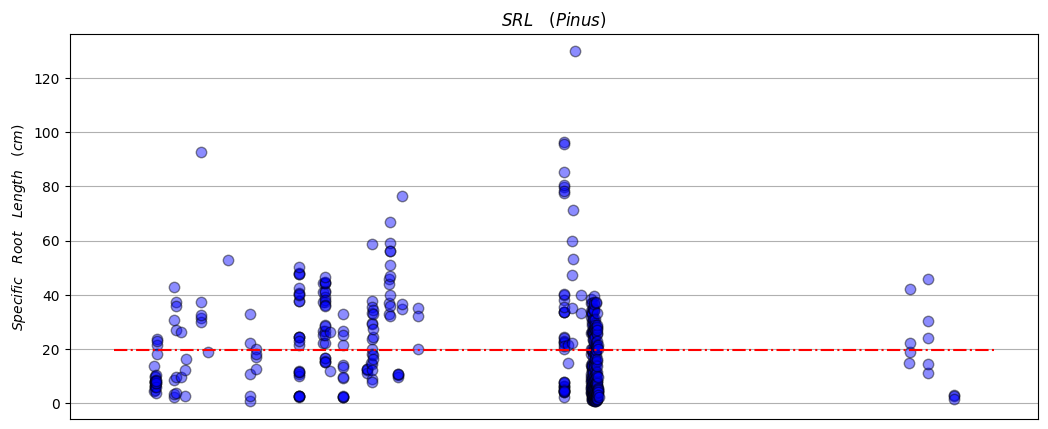

In [136]:
fig, axes = plt.subplots()
fig.set_size_inches(12.5, 5)
axes.set_axisbelow(True)
axes.plot(pinus_specific_root_length.traitValue, linestyle="none", marker="o", markerfacecolor="blue", markeredgecolor="black", markersize=7.5, alpha=0.45)
axes.hlines(y=pinus_specific_root_length.traitValue.mean(), xmin=axes.get_xlim()[0], xmax=axes.get_xlim()[1], color="red", linestyle="-.")
axes.set_xticks([])
axes.grid()
axes.set_title(r"$SRL\hspace{1}(Pinus)$")
axes.set_ylabel(r"$Specific\hspace{1}Root\hspace{1}Length\hspace{1}(cm)$")
plt.show()

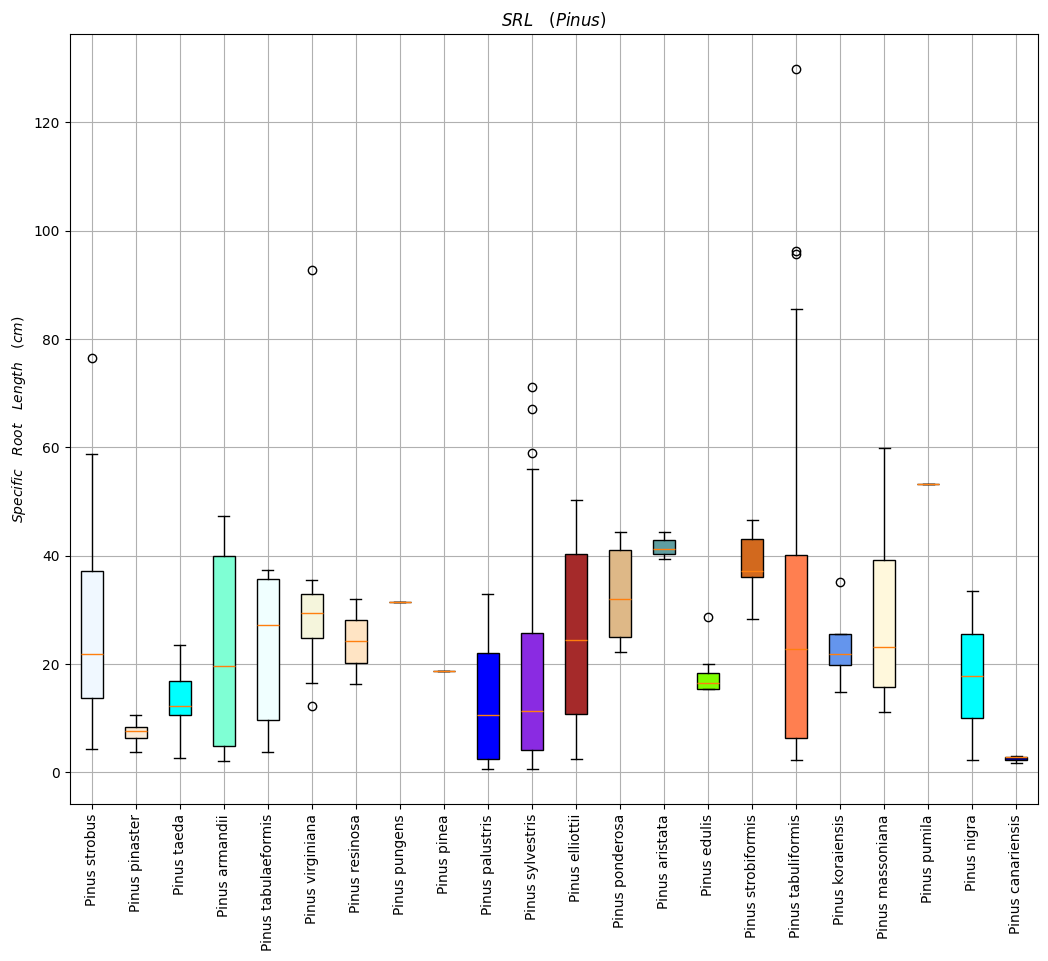

In [141]:
fig, axes = plt.subplots()
fig.set_size_inches(12.5, 10)
axes.set_axisbelow(True)

bplot= axes.boxplot([pinus_specific_root_length.loc[pinus_specific_root_length.species == sp, "traitValue"] for sp in pinus_specific_root_length.species.unique()],
            patch_artist=True)
for i, box in enumerate(bplot.get("boxes")):
    box.set_facecolor(colours[i])
axes.set_xticks(ticks=range(1, 23), labels=[f"Pinus {sp}" for sp in pinus_specific_root_length.species.unique()], rotation=90)
axes.grid()
axes.set_title(r"$SRL\hspace{1}(Pinus)$")
axes.set_ylabel(r"$Specific\hspace{1}Root\hspace{1}Length\hspace{1}(cm)$")
plt.show()

In [178]:
# FERD

fred = pd.read_csv(r"./FRED/FRED3_Entire_Database_2021.csv", low_memory=False, skiprows=range(1,10))
columns = pd.read_csv(r"./FRED/FRED3_Column_Definitions_2021.csv")

In [180]:
columns.column_id

0       F00001
1       F00002
2       F00003
3       F00004
4       F00005
         ...  
1190    F01470
1191    F01471
1192    F01472
1193    F01473
1194    F01474
Name: column_id, Length: 1195, dtype: object

In [181]:
columns = pd.Series(index=columns.column_id, data=columns.name.str.lower().str.replace(' ', '_').str.replace('+', "plus").values)

In [182]:
columns

column_id
F00001            version_fred_version_number
F00002                           notes_row_id
F00003           abbreviated_article_citation
F00004                   data_source_citation
F00005                        data_source_doi
                         ...                 
F01470    n_soil_ca_exchangeable_ca2plus_mass
F01471                       n_soil_k_content
F01472                      se_soil_k_content
F01473    n_soil_mg_exchangeable_mg2plus_mass
F01474     n_soil_na_exchangeable_naplus_mass
Length: 1195, dtype: object

In [188]:
fred.rename(columns={id: name for (id, name) in zip(columns.index, columns.values)}, inplace=True)

In [189]:
# 
fred.loc[:, []]

,version_fred_version_number,notes_row_id,abbreviated_article_citation,data_source_citation,data_source_doi,data_set_citation,data_set_doi,notes_site_id,data_raw_or_unpublished,data_duplicate_data,...,se_aboveground_biomass_per_ground_area,aboveground_biomass_per_plant,stem_mass_per_plant,leaf_mass_per_plant,"leaf_mass_ratio_(lmr,_lwr)",aboveground_growth_annual_net_primary_production_per_ground_area,n_aboveground_growth_annual_net_primary_production_per_ground_area,se_aboveground_growth_annual_net_primary_production_per_ground_area,aboveground_annual_c_production,notes_miscellaneous_notes
0,1,1,Long et al 2013,"Long Y, Kong D, Chen Z, Zeng H. 2013. Variatio...",10.1371/journal.pone.0057153,NaN,NaN,1,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,2,Long et al 2013,"Long Y, Kong D, Chen Z, Zeng H. 2013. Variatio...",10.1371/journal.pone.0057153,NaN,NaN,1,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,3,Long et al 2013,"Long Y, Kong D, Chen Z, Zeng H. 2013. Variatio...",10.1371/journal.pone.0057153,NaN,NaN,1,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,4,Long et al 2013,"Long Y, Kong D, Chen Z, Zeng H. 2013. Variatio...",10.1371/journal.pone.0057153,NaN,NaN,1,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1,5,Long et al 2013,"Long Y, Kong D, Chen Z, Zeng H. 2013. Variatio...",10.1371/journal.pone.0057153,NaN,NaN,1,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57185,3,57516,Lin et al 2020,"Lin D, Yang S, Dou P, Wang H, Wang F, Qian S, ...",10.1093/aob/mcz166,NaN,NaN,NaN,contributed,x,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Species not found in TRY categorical traits pa...
57186,3,57517,Lin et al 2020,"Lin D, Yang S, Dou P, Wang H, Wang F, Qian S, ...",10.1093/aob/mcz166,NaN,NaN,NaN,contributed,x,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Species not found in TRY categorical traits pa...
57187,3,57518,Lin et al 2020,"Lin D, Yang S, Dou P, Wang H, Wang F, Qian S, ...",10.1093/aob/mcz166,NaN,NaN,NaN,contributed,x,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
57188,3,57519,Lin et al 2020,"Lin D, Yang S, Dou P, Wang H, Wang F, Qian S, ...",10.1093/aob/mcz166,NaN,NaN,NaN,contributed,x,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
